# Lab | Data Cleaning and Wrangling 

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

In [80]:
# An auto insurance company has collected some data about its customers 
# including their demographics, education, employment, policy details, vehicle information on which insurance policy is
# , and claim amounts. 
# You will help the senior management with some business questions that will help them to better understand their customers,
# improve their services, and improve profitability.

# Some business Objectives:
# Retain customers, Analyze relevant customer data, Develop focused customer retention programs. 
# Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.

In [81]:
# For this lab, we will be using the same dataset we used in the previous labs. 
# We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs.

# Instructions
# So far we have worked on EDA. This lab will focus on data cleaning and wrangling from everything we noticed before.

# 1. We will start with removing outliers. 
# So far, we have discussed different methods to remove outliers. 
# Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.

# 2. Create a copy of the dataframe for the data wrangling.
# 3. Normalize the continuous variables. You can use any one method you want.
# 4. Encode the categorical variables
# 5. The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.
# 6. Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.
# Hint for Categorical Variables

# You should deal with the categorical variables as shown below (for ordinal encoding, dummy code has been provided as well):

In [82]:
# 1. Import data from previous labs. 
num_df = pd.read_csv('numerical.csv')
num_cols = num_df.columns
print(num_df.shape)
num_df.head()

(9134, 9)


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,effective_to_date
0,2763.519279,56274,69,32,5,0,1,384.811147,2011-02-24
1,6979.535903,0,94,13,42,0,8,1131.464935,2011-01-31
2,12887.431650,48767,108,18,38,0,2,566.472247,2011-02-19
3,7645.861827,0,106,18,65,0,7,529.881344,2011-01-20
4,2813.692575,43836,73,12,44,0,1,138.130879,2011-02-03


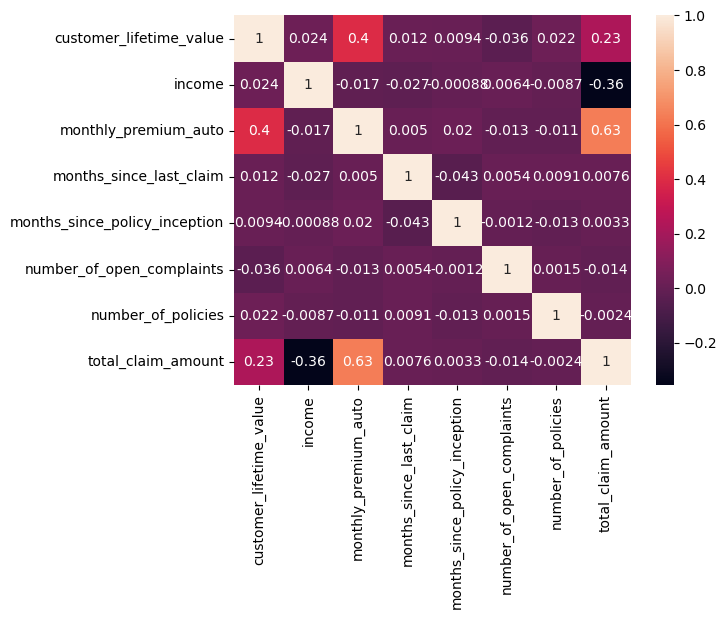

In [83]:
sns.heatmap(num_df.corr(), annot=True)
plt.show()

num_df = num_df.drop('monthly_premium_auto', axis=1)
# Columns 'total_claim_amount' and 'montly_premium_auto' display strong correlation.
# Columns 'customer_lifetime_value' and 'montly_premium_auto' display weak / moderate correlation.

In [84]:
num_df.head()

,customer_lifetime_value,income,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,effective_to_date
0,2763.519279,56274,32,5,0,1,384.811147,2011-02-24
1,6979.535903,0,13,42,0,8,1131.464935,2011-01-31
2,12887.431650,48767,18,38,0,2,566.472247,2011-02-19
3,7645.861827,0,18,65,0,7,529.881344,2011-01-20
4,2813.692575,43836,12,44,0,1,138.130879,2011-02-03


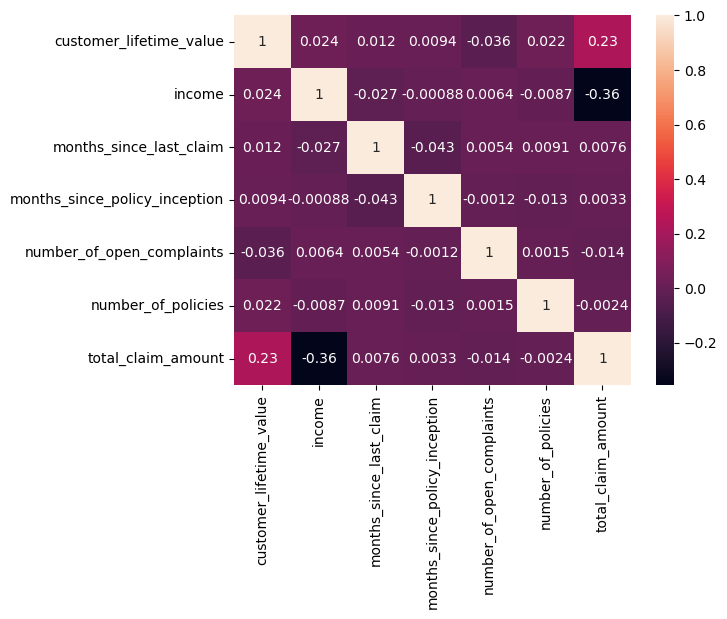

In [85]:
sns.heatmap(num_df.corr(), annot=True)
plt.show()

In [86]:
cat_df = pd.read_csv('categorical.csv')
print(cat_df.shape)
cat_df.head()

(9134, 13)


,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Offer1,Agent,Four-Door Car,Medsize


In [87]:
df = pd.concat([num_df, cat_df], axis=1)
print(df.shape)
print(df.info())
df.head()

(9134, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_lifetime_value        9134 non-null   float64
 1   income                         9134 non-null   int64  
 2   months_since_last_claim        9134 non-null   int64  
 3   months_since_policy_inception  9134 non-null   int64  
 4   number_of_open_complaints      9134 non-null   int64  
 5   number_of_policies             9134 non-null   int64  
 6   total_claim_amount             9134 non-null   float64
 7   effective_to_date              9134 non-null   object 
 8   state                          9134 non-null   object 
 9   response                       9134 non-null   object 
 10  coverage                       9134 non-null   object 
 11  education                      9134 non-null   object 
 12  employmentstatus               9134 n

,customer_lifetime_value,income,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,effective_to_date,state,response,...,education,employmentstatus,gender,location_code,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,2763.519279,56274,32,5,0,1,384.811147,2011-02-24,Washington,No,...,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Offer1,Agent,Two-Door Car,Medsize
1,6979.535903,0,13,42,0,8,1131.464935,2011-01-31,Arizona,No,...,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Offer3,Agent,Four-Door Car,Medsize
2,12887.431650,48767,18,38,0,2,566.472247,2011-02-19,Nevada,No,...,Bachelor,Employed,F,Suburban,Married,Personal Auto,Offer1,Agent,Two-Door Car,Medsize
3,7645.861827,0,18,65,0,7,529.881344,2011-01-20,California,No,...,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Offer1,Call Center,SUV,Medsize
4,2813.692575,43836,12,44,0,1,138.130879,2011-02-03,Washington,No,...,Bachelor,Employed,M,Rural,Single,Personal Auto,Offer1,Agent,Four-Door Car,Medsize


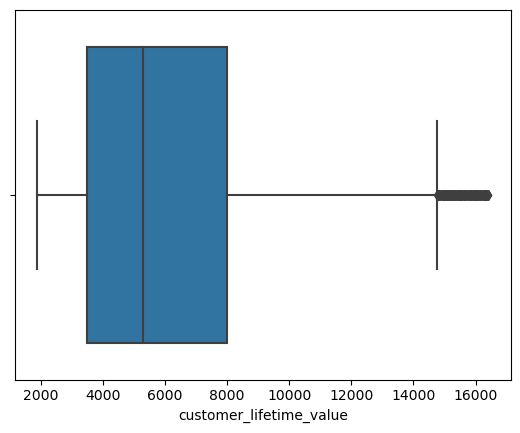

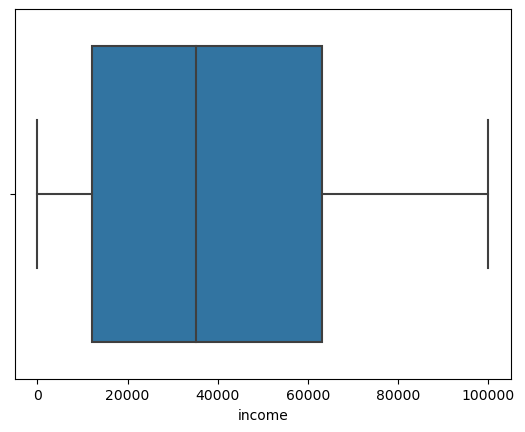

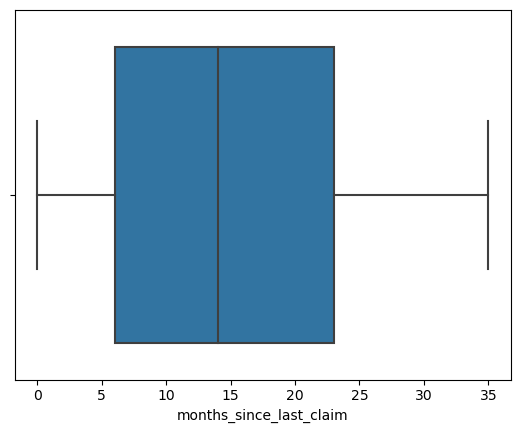

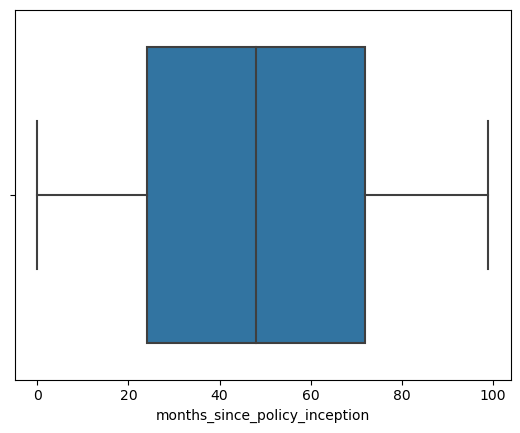

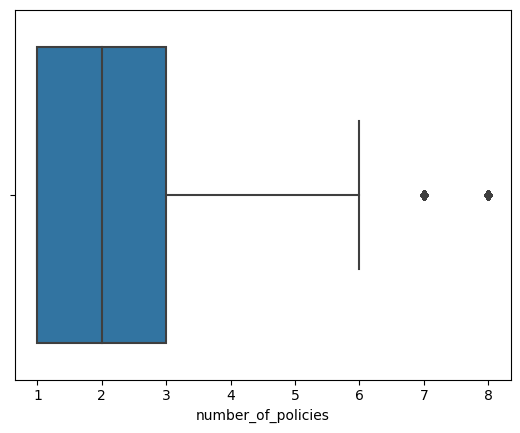

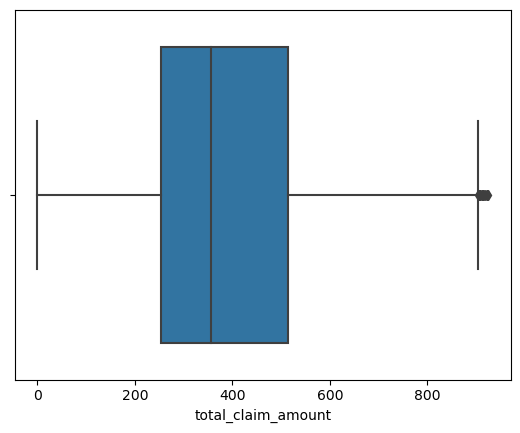

In [93]:
# 1. We will start with removing outliers. 
# So far, we have discussed different methods to remove outliers. 
# Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.
cols_to_clean = ['customer_lifetime_value', 'income',
       'months_since_last_claim', 'months_since_policy_inception', 'number_of_policies',
       'total_claim_amount']
for col in cols_to_clean:
    sns.boxplot(x = col,data=df)
    plt.show()

In [94]:
def clean_outliers(df, columns):
    for col in columns:
        q3 = df[col].quantile(0.75)
        q1 = df[col].quantile(0.25)
        IQR = q3 - q1
        upper_limit = q3 + 1.5*IQR
        lower_limit = q1 - 1.5*IQR
        df = df[(df[col] >= lower_limit) & (df[col] <= upper_limit)]
    return df

In [95]:
df_clean = clean_outliers(df, cols_to_clean)

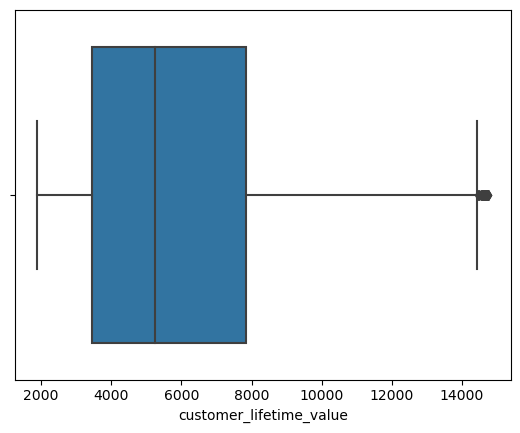

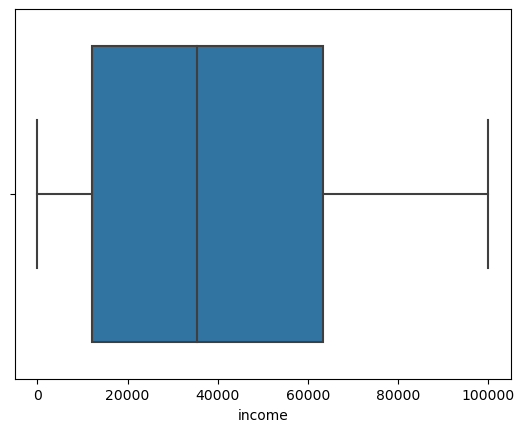

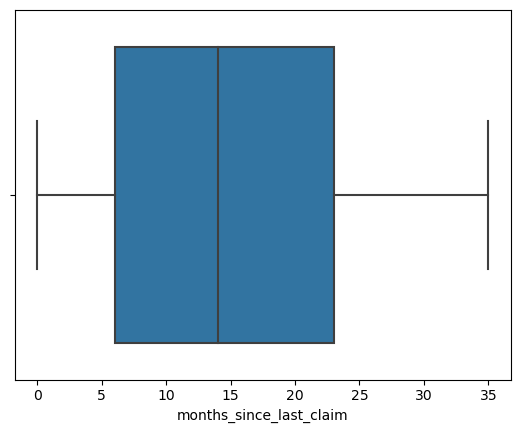

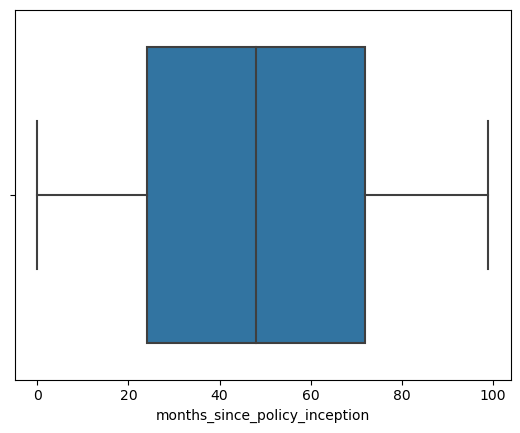

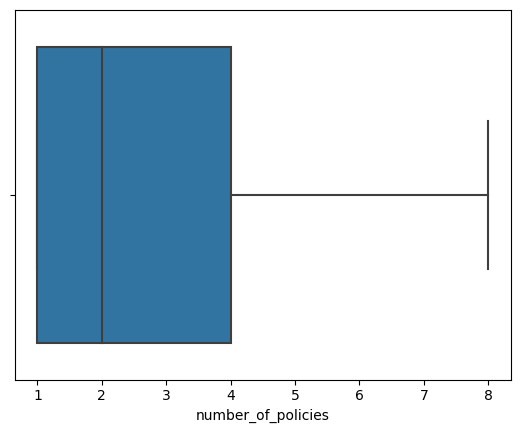

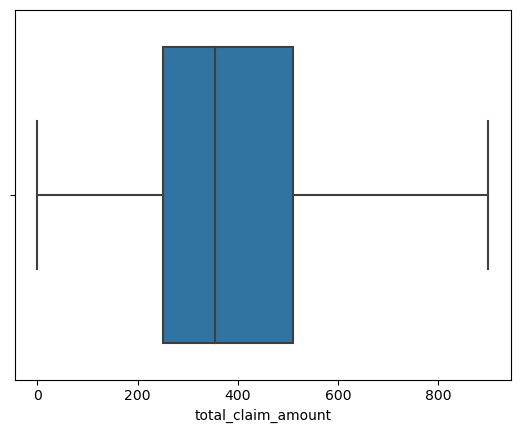

In [96]:
for col in cols_to_clean:
    sns.boxplot(x = col,data=df_clean)
    plt.show()

In [97]:
# 2. Create a copy of the dataframe for the data wrangling.
df = df_clean.reset_index(drop=True).copy()

print(df.shape)
df.head()

(7261, 22)


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,effective_to_date,state,...,education,employmentstatus,gender,location_code,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,2763.519279,56274,69,32,5,0,1,384.811147,2011-02-24,Washington,...,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Offer1,Agent,Two-Door Car,Medsize
1,12887.431650,48767,108,18,38,0,2,566.472247,2011-02-19,Nevada,...,Bachelor,Employed,F,Suburban,Married,Personal Auto,Offer1,Agent,Two-Door Car,Medsize
2,7645.861827,0,106,18,65,0,7,529.881344,2011-01-20,California,...,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Offer1,Call Center,SUV,Medsize
3,2813.692575,43836,73,12,44,0,1,138.130879,2011-02-03,Washington,...,Bachelor,Employed,M,Rural,Single,Personal Auto,Offer1,Agent,Four-Door Car,Medsize
4,8256.297800,62902,69,14,94,0,2,159.383042,2011-01-25,Oregon,...,Bachelor,Employed,F,Rural,Married,Personal Auto,Offer2,Web,Two-Door Car,Medsize


In [98]:
y = df['total_claim_amount']
df = df.drop('total_claim_amount', axis=1)
print(df.shape)
print(y.shape)

(7261, 21)
(7261,)


In [99]:
# 3. Normalize the continuous variables. You can use any one method you want.
# Normalize the numerical variables

num = df.select_dtypes(include=(int, float))
scaler = StandardScaler()
num_scaled = scaler.fit_transform(num)
num_scaled = pd.DataFrame(num_scaled)
print(num_scaled.shape)
num_scaled.head()

(7261, 7)


,0,1,2,3,4,5,6
0,-1.061661,0.576306,-0.769856,1.691296,-1.539658,-0.421835,-0.821412
1,2.370772,0.329297,1.051940,0.295717,-0.360311,-0.421835,-0.349518
2,0.593659,-1.275324,0.958514,0.295717,0.604609,-0.421835,2.009955
3,-1.044650,0.167048,-0.583005,-0.302389,-0.145885,-0.421835,-0.821412
4,0.800622,0.794392,-0.769856,-0.103020,1.641005,-0.421835,-0.349518


In [100]:
# 4. Encode the categorical variables
# Hint for Categorical Variables
# You should deal with the categorical variables as shown below (for ordinal encoding, dummy code has been provided as well):
# One hot: state, marital status, policy type, policy,renew offer,sales channel,vehicle class 
# Ordinal: coverage, employmentstatus, location code, vehicle size

# data["coverage"] = data["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
# given that column "coverage" in the dataframe "data" has three categories:
# "basic", "extended", and "premium" and values are to be represented in the same order.

cat = df.select_dtypes(include=(object))
one_hot_cols = ['state', 'response', 'marital_status', 'education','gender', 'policy_type','renew_offer_type', 'sales_channel', 'vehicle_class']
ordinal_cols = ['coverage', 'employmentstatus', 'location_code','vehicle_size']
unchanged_cols = ['effective_to_date']

print(cat.shape)
cat.head()


(7261, 14)


,effective_to_date,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,2011-02-24,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Offer1,Agent,Two-Door Car,Medsize
1,2011-02-19,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Offer1,Agent,Two-Door Car,Medsize
2,2011-01-20,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Offer1,Call Center,SUV,Medsize
3,2011-02-03,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Offer1,Agent,Four-Door Car,Medsize
4,2011-01-25,Oregon,Yes,Basic,Bachelor,Employed,F,Rural,Married,Personal Auto,Offer2,Web,Two-Door Car,Medsize


In [101]:
one_hot_encoder = OneHotEncoder()
one_hot_data = one_hot_encoder.fit_transform(cat[one_hot_cols])
one_hot_df = pd.DataFrame(one_hot_data.toarray(), columns=one_hot_encoder.get_feature_names(one_hot_cols))
cat = pd.concat([cat, one_hot_df], axis=1)
cat.drop(columns=one_hot_cols, inplace=True)


ordinal_encoder = OrdinalEncoder()
cat[ordinal_cols] = ordinal_encoder.fit_transform(cat[ordinal_cols])


cat[unchanged_cols] = cat[unchanged_cols]


C:\Users\garpa\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [102]:
print(cat.shape)
cat.head()

(7261, 37)


,effective_to_date,coverage,employmentstatus,location_code,vehicle_size,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,...,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Agent,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car
0,2011-02-24,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2011-02-19,2.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2011-01-20,0.0,4.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,2011-02-03,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2011-01-25,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [103]:
# 5. The time variable can be useful. 
#Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.
cat['effective_to_date'] = pd.to_datetime(cat['effective_to_date'])

cat['day'] = cat['effective_to_date'].dt.day
cat['month'] = cat['effective_to_date'].dt.month
cat['year'] = cat['effective_to_date'].dt.year

In [104]:
# 6. Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

cat.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7261 entries, 0 to 7260
Data columns (total 40 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   effective_to_date               7261 non-null   datetime64[ns]
 1   coverage                        7261 non-null   float64       
 2   employmentstatus                7261 non-null   float64       
 3   location_code                   7261 non-null   float64       
 4   vehicle_size                    7261 non-null   float64       
 5   state_Arizona                   7261 non-null   float64       
 6   state_California                7261 non-null   float64       
 7   state_Nevada                    7261 non-null   float64       
 8   state_Oregon                    7261 non-null   float64       
 9   state_Washington                7261 non-null   float64       
 10  response_No                     7261 non-null   float64       
 11  resp

In [105]:
cat = cat.drop('effective_to_date', axis=1)
cat.head()

,coverage,employmentstatus,location_code,vehicle_size,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,response_No,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,day,month,year
0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,24,2,2011
1,2.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,19,2,2011
2,0.0,4.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,20,1,2011
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3,2,2011
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,25,1,2011


In [106]:
cat.shape

(7261, 39)

In [107]:
num_scaled.shape

(7261, 7)

In [108]:
final = pd.concat([num_scaled, cat], axis=1)

In [109]:
final.head()

,0,1,2,3,4,5,6,coverage,employmentstatus,location_code,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,day,month,year
0,-1.061661,0.576306,-0.769856,1.691296,-1.539658,-0.421835,-0.821412,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,24,2,2011
1,2.370772,0.329297,1.051940,0.295717,-0.360311,-0.421835,-0.349518,2.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,19,2,2011
2,0.593659,-1.275324,0.958514,0.295717,0.604609,-0.421835,2.009955,0.0,4.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,20,1,2011
3,-1.044650,0.167048,-0.583005,-0.302389,-0.145885,-0.421835,-0.821412,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3,2,2011
4,0.800622,0.794392,-0.769856,-0.103020,1.641005,-0.421835,-0.349518,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,25,1,2011


In [110]:
final.head()

,0,1,2,3,4,5,6,coverage,employmentstatus,location_code,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,day,month,year
0,-1.061661,0.576306,-0.769856,1.691296,-1.539658,-0.421835,-0.821412,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,24,2,2011
1,2.370772,0.329297,1.051940,0.295717,-0.360311,-0.421835,-0.349518,2.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,19,2,2011
2,0.593659,-1.275324,0.958514,0.295717,0.604609,-0.421835,2.009955,0.0,4.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,20,1,2011
3,-1.044650,0.167048,-0.583005,-0.302389,-0.145885,-0.421835,-0.821412,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3,2,2011
4,0.800622,0.794392,-0.769856,-0.103020,1.641005,-0.421835,-0.349518,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,25,1,2011


In [111]:
final.to_csv('cat_num.csv')

In [112]:
y.to_csv('total_claim_amount.csv')